<a href="https://colab.research.google.com/github/sehbaw/UMB_PSC/blob/main/Dataset_Creation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

ctrl+shift+p for command palette

# working code starts here. 

In [ ]:
#testing..main one
import pandas as pd
import numpy as np
import random, string


#id = ''.join(random.choice(string.ascii_lowercase + string.digits) for i in range(8))
# create a range of sample IDs
#sample_ids = [f' ID {id}' for i in range(10000)] #this code doesnt work because it will not generate a new 

def generate_id():
    return ''.join(random.choice(string.ascii_lowercase + string.digits) for i in range(8))

# create a range of sample IDs
sample_ids = [f'ID {generate_id()}' for i in range(10000)]

#generate date
date = pd.date_range('2023-01-03', '2023-01-31') # over the span of a month 

#generate temp
temp = [np.random.uniform(21,24) for i in range(10000)] #these are decimals because that is the only way I could 

# generate in a range 
absorbances = np.clip(np.random.normal(0.15, 0.84, size=10000), a_min = 0.15, a_max=0.92)

#quick to check to see if we are at 

#for np.sum((absorbances >= 0.34) & (absorbances <= 0.54)) <=10000:
    #absorbances=np.clip(np.random.normal(0.21, 0.84, size=10000), a_min = 0.15, a_max=0.9)
    #absorbances = np.random.normal(0.21, 0.84, size=1000)
    
#print(absorbances)
    
range_points = (absorbances == 0.35) & (absorbances == 0.54)
while len(range_points) < 1000:
    new_points = [np.random.normal(0.15, 0.84) for i in range(1000)]
    range_points += [p for p in new_points if p >= 0.35 and p <= 0.54]
    
#sample = np.array(target_absorbances)[target_absorbances][:1000]



#create the dataframe to put generated data
drug_candidate = pd.DataFrame({'Sample ID': sample_ids,
                     'Temp': temp,
                     'Date': np.random.choice(date, size=10000), # had to add a size because other generated the same date
                     'Absorbance': np.random.choice(absorbances, size=10000)})

#data.to_csv(index=False)


        
drug_candidate.to_csv('drug_candidate.txt', sep='\t', index=False, header=["Sample ID","Temp","Date","Absorbance"])
drug_candidate.to_csv('drug_candidate1.csv', sep='\t', index=False, header=["Sample ID","Temp","Date","Absorbance"])



    #NEED TO FIX THIS -- the insert null data function is doing this to me why 
#df = drug_candidate.apply(insert_null_data(drug_candidate))
#print(df)



# Search and Set Data 


In [ ]:
#filtering the target absorbance to make sure that there are at least 1000 data points..not sure if this is the best way to handle this though

#target_absorbances = (absorbances >= 0.35) & (absorbances <= 0.54) #this is essentially useless because doesn't respect the structure of the dataframe just is a conditional essentially 
#sample = np.array(sample_ids)[target_absorbances][:1000] #we want to use 

drug_cand = drug_candidate

# ---  actual filter that is then sent to a txt file. 
filtered_df = drug_cand[(drug_cand["Absorbance"] >= 0.35) & (drug_cand['Absorbance'] <= 0.54)]
filtered_df.to_csv('filtered_df.txt', sep='\t', index=False, header=["Sample ID","Temp","Date","Absorbance"])


# display the filtered DataFrame


In [ ]:
#if we want to send csv to a zcop 
compression_opts = dict(method='zip',
                        archive_name='candidate.csv')  
data.to_csv('candidate.zip', index=False,
          compression=compression_opts) 


# Dirtying the Data 

In [ ]:

#DOES NOT WORK 

#dirtying int the data 
    #randomly insert null values 
        # set the probability of a cell being set to NA
def insert_null_data(dataset): #don't believe this needs a parameter
    probability = 0.03 #want to keep the number small 
# loop through the DataFrame and set some values to NA
    for i in range(len(drug_candidate): 
         for col in drug_candidate.columns:
            if random.random() < probability:
                 df.at[i, col] = np.nan #.loc doesn't really apply here 

In [7]:
import pandas as pd
import numpy as np
import random

df = pd.read_table("/drug_dataset_final.txt")

replace = random.sample(range(len(df["Absorbance"])), 200)
for index in replace:
    df[index] = None
df.to_csv('drug_null.txt', sep='\t', index=False, header=["Sample ID","Temp","Date","Absorbance"])

<ipython-input-7-55ebf73a7c1e>:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[index] = None
<ipython-input-7-55ebf73a7c1e>:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[index] = None
<ipython-input-7-55ebf73a7c1e>:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[index] = None
<ipython-i

ValueError: ignored

In [10]:
import pandas as pd
import numpy as np
import random
#this runs better in jupyter notebook (obviously) so you have to take out the foward slash when you transfer it to jupyter notebook

# Read the existing dataset
df = pd.read_table("/drug_dataset_final.txt")

# Replace points with None in a specific column
replace = random.sample(range(len(df["Absorbance"])), 200)
for index in replace:
    df.loc[index, "Absorbance"] = None

num_negatives = 100  # Number of negative values to insert
negative_values = np.random.uniform(low=-1.0, high=0.0, size=num_negatives)
df.replace(loc=0, column="Absorbance", value=negative_values)
# Save the modified dataset
df.to_csv("/drug_null.txt", index=False, sep="\t")

TypeError: ignored

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

How can we dirty the data? 
- Null values randomnly inserted or replaced
- outliers can be found in initial data but also could implement our own
- throw in spaces...not necessarily null values but just break upthe data kinda with random cells 
- can combine cells with two points together seperated by a comma and they have to break those
- trailing spaces and white spaces
- maybe have to perform data transformation -- why did I put this here. 


# visualization - mix of pyplot and seaborn 


(0.3, 0.6)

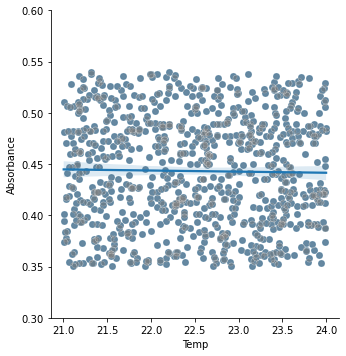

In [ ]:
#filtered data
#regression line
#sns.lmplot(data=drug_candidate, x='Temp', y='Absorbance')
#unfiltered data 
import seaborn as sns 
import matplotlib.pyplot as plt
candidate = filtered_df
sns.lmplot(data=candidate, x="Temp", y="Absorbance")
#took out size parameter
#sns.jointplot(data=drug_candidate[(drug_candidate["Absorbance"] >= 0.35) & (drug_candidate["Absorbance"] <= 0.54)], x="Temp", y="Absorbance", hue="Range", palette=["pastel"], marker="o", edgecolor="black", linewidth=0.5)

highlighted_data = candidate[(candidate["Absorbance"] >= 0.35) & (candidate["Absorbance"] <= 0.54)]
sns.scatterplot(data=highlighted_data, x="Temp", y="Absorbance", color="grey", s=50, alpha=0.5) #was aiming for hue 
#legend set? 

#plt.axvspan(20, 30, color='gray', alpha=0.5)

#need to change axes limit -- set limit not working!!!

#Axes.set_ylim(left=0, right=0.9, emit=True, auto=False, xmin=None, xmax=None)
plt.ylim(0.1 , 1.01) #go beyond the the wanted limit 

plt.ylim(0.3, 0.6)

#Graph Title -- 

In [ ]:
#unfiltered data 
import seaborn as sns 
import matplotlib.pyplot as plt
import pandas as pd
drug_candidate = pd.read_csv("drug_candidate1.csv")
candidate = drug_candidate
#sns.scatterplot(data=drug_candidate, x="Temp", y="Absorbance")
sns.scatterplot(data=candidate, x="Temp", y="Absorbance")

#took out size parametee
#sns.jointplot(data=drug_candidate[(drug_candidate["Absorbance"] >= 0.35) & (drug_candidate["Absorbance"] <= 0.54)], x="Temp", y="Absorbance", hue="Range", palette=["pastel"], marker="o", edgecolor="black", linewidth=0.5)

highlighted_data = candidate[(candidate["Absorbance"] >= 0.35) & (candidate["Absorbance"] <= 0.54)]
sns.scatterplot(data=highlighted_data, x="Temp", y="Absorbance", color="red", s=50, alpha=0.5) #was aiming for hue 
#legend set? 

#plt.axvspan(20, 30, color='gray', alpha=0.5)

#need to change axes limit -- set limit not working!!!

#Axes.set_ylim(left=0, right=0.9, emit=True, auto=False, xmin=None, xmax=None)
#plt.xlim(21.0, 25.0, 0.1)
plt.ylim(0.1 , 1.01) #go beyond the the wanted limit 

plt.ylim(0.1, 1.04,0.1)

#Graph Title -- 








ValueError: Could not interpret value `Temp` for parameter `x`